# Mandatory assigment GEO2310: Thermodynamics

In the atmosphere we have different heating/cooling in different heights (more on this in later chapters). This can lead to the atmosphere becoming statically unstable and thus we can get vertical mixing of airmasses.

In this assignment we will program a very simplified column model. We make a model which takes a temperature profile and lifts/lowers air until we have a stable profile. 

**Assumptions for model:**

- We use pressure coordinates

We make some simplifications:

- We assume no mixing of air to surroundings (each box in the model is an isolated air parcel) when the air is lifted/lowered.

- We assume that the column consists of only dry air (potential temperature is conserved)


## Exercise 1


We start by making a class in python for the model grid.

We'll use pressure coordinates. The boxes in the column should be spaced with equal pressure difference between each box (like this mass is conserved).

In addition add an array **for** the height in meters. We'll assume a constant scale height and use eq. 3.25 in the book.

Check that the grid by plotting pressure against height with 100 boxes with highest pressure of 10 hPa and lowest pressure 1000 hPa. Let the scale height be 8000 m (basec on T=273 K ). 

Why is it not really correct to use a constant scale height here? What should we have really done to get the correct height for each pressure level?

In [2]:
import numpy as np
import sys
import pandas as pd
Lv = 3.34*10**5 # J/kg Latent varmekapasitet
cp=1004. # Spesifikk varmekapasitet tørr luft, konstant trykk
r2cp=287/1004.# 0.286 #R/cp

class Grid:
    #scale_H = 8000 # assume constant, T = 273 K, H = 8000 m
    def __init__(self, nr_boxes, top_pressure, p0=1000.,scale_H=8000):
        self.p0=p0 # hPa
        self.nr_boxes = nr_boxes # number of boxes
        self.scale_H = scale_H # [m] scale height atmosphere
        return
    def say_hi(self):
        print('Hello')
        return
        #p_mid = # mid box pressure [hPa]
        #self.z_mid= # [m] mid box height 

In [3]:
grd=Grid(10, 100)

grd.say_hi()

#print('HELLO GEO2310')

Hello


## Exercise  2

We'll now make a class that holds a temperature profil. It should be based on the grid glass you made in the previous exercise, but in addition it should take a temperature profil.

1. Add an initialization fuction (def \_\_init\_\_(self,input1, input2 osv)) that takes a the variables to initialize the grid (number of boxes, top pressure, bottom pressure and scale height). Add to the init function that it takes a temperature profile and adds it as self.temperatures in the class. 

2. Add a function in the class that computes potential temperature $\theta$ from temperature and one that computes potential temperature to temperature (temp2theta(..) and theta2temp(..)). Make an instance of the model with a temperature profile (you can choose how it looks) and plot temperature and potential temperature. 

3. Change the init function from point 1 so that it can be initialized with either a potential temperature or a temperature profil. Plot temperature and potential temperature for a stable and an unstable profile. 


In [7]:
class Temperature_profile(Grid):
    r2cp=287/1004.#0.286 #R/cp
    
    def __init__(self, nr_boxes, top_pressure, temperatures=np.array([]), theta=np.array([]), p0=1000., scale_H=8000):
        # initialiser gridded ved å kalle init funksjonen til super klassen.
        super().__init__(nr_boxes, top_pressure, p0, scale_H)
        if len(temperatures)>0:
            #use temp to initialize
        else:
            #use theta to initialize. 
        #self.temperatures
        #self.theta
        return
        
        
        
    def temp2theta(self, temperatures):
        #compute potential temperature from temperature profile
        return# theta

    def theta2temp(self,theta):
        # compute temperature from potential temperature profile
        return #temperatures       
        
    def lift_box(self,i):
        # Løfter en boks til den er stabil.
        # Oppgave 3
        return #box_shifted

            
    def equilibrium(self):
        # Lar luft løftes/senkes til likevekt
        # Oppgave 3
        return 
    
    def heat_profile(self,heating_rate, dt):
        return
    
        
        
        
        
   

## Exersice 3
1. Add a function that takes an index of a box and lifts that box until its stable and moves the other boxes down (`lift_box(self,i)`).

2. Make a script that lets the boxes be lifted/pushed down until the column is stable (by calling the function from 1). Test that your script does what you expect it to by making an instable profile ($\theta$ decreasing with height) and 5 boxes in total and plot between every time you move a box. Then add a function to the class that does this (`equilibrium(self)`). You can use the script below as inspiration.


In [ ]:
# 2: Under følger en eksempelkode som du kan ta utgangspunkt i
import numpy as np
nr_of_boxes=5
top_pres=10. # hPa
theta= 300+np.arange(nr_of_boxes)/nr_of_boxes

temp_prof = Temperature_profile(nr_of_boxes, top_pres, theta=theta)

# Lar luft løftes/senkes til likevekt
i=0 #len(temp_prof.p_mid)-1
while i<nr_of_boxes: # for i in np.arange(0,len(self.grid.p_mid))[::-1]:
    plt.plot(temp_prof.theta, temp_prof.p_mid, label='%.0f'%i)
    
    box_shifted = temp_prof.lift_box(i) # Løft en boks
    
    if not box_shifted: i=i+1 # Hvis boksen ikke er løftet kan du gå et steg ned/opp:
    temp_prof.temperatures=temp_prof.theta2temp(temp_prof.theta)
    
plt.gca().invert_yaxis()
plt.legend()
plt.yscale('log')
plt.show()


## Oppgave 4
Let the top pressure be 10 hPa and the number of boxes be 1000.

Initialize 3 temperature profiles: One stable, one unstable and one which you can read with the following function:


```python
import read_in_temp
temp3=read_in_temp.read_temperatures_and_interpolate_to_grid('temperatures.csv', Grid(nr_of_boxes, top_pres).p_mid) 
```
This gives you a semi realitic temperature profile. 

Plot the profiles before and after equilibrium. 

Try to vary the top pressure so that you can actually see the change in the last profile. Describe the changes and you see and explain what kind of natural phenomena this could represent.


## Exercise 5: Diabatic heating
We will noe add a heating rate to the model. We'll add a diabatic heating to imitate heating by solar insolation during the day. 

Add a function that takes a heating rate (K/hour) for every box in the model and a time step (e.g. 1 hour) and changes the temperature accordingly. That is, if I give the fuction a heating rate of 1 K/h and a timestep of 1/2 hour, then the temperature will rise by 0.5 K. 

Start with the temperature profile from the last exercise: 
```python
import read_in_temp
temp3=read_in_temp.read_temperatures_and_interpolate_to_grid('temperatures.csv', Grid(nr_of_boxes, top_pres).p_mid) 
```
Give the model the following profile for heating:


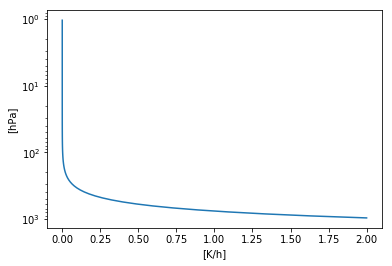

In [18]:
# 
heating_rate =2*np.exp(- 20*np.linspace(0,1,nr_of_boxes)[::-1]) # K/h
grid= Grid(nr_of_boxes, top_pres)
plt.plot( heating_rate, grid.p_mid)#
plt.xlabel('[K/h]')
plt.ylabel('[hPa]')
plt.yscale('log')
plt.gca().invert_yaxis()

Use a time step of 1 hour. Plot the result before the heating, after the heating and when the model is in a new equilibrium.


## Exercicse 6:
Finallly, we will make a little film with our model when we add a heating rate. The film should show how temperature and potential temperature changes over time.

To simulate the diurnal variation, multiply the heating rate from the last exercise with a sinus function. E.g. like this:
```python
heating_rate*np.sin(i*timestep/24*2*np.pi)
```
where i is the index (of time). 

Use a timestep of 1 hour, but try to vary the timestep. Run the model for 2 days. Describe what happens. What kind of natural phenomena could this be compared to? What changes when you change the timestep?



In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
top_pres=400
nr_of_boxes=1000
timestep=1. #h
# Les inn temperaturprofil:
temperatures = read_in_temp.read_temperatures_and_interpolate_to_grid('temperatures.csv', Grid(nr_of_boxes, top_pres).p_mid) 

# Initialiser:

temp_profil = Temperature_profile(nr_of_boxes, top_pres,temperatures=temperatures)


# La stå:
fig, ax = plt.subplots()
ax.set_xlim(( 225, 400))
ax.set_ylim((min(temp_profil.p_mid),max(temp_profil.p_mid))
lines = []#
lines.append(plt.semilogy([],[], label=r'$\theta$')[0])
lines.append(plt.semilogy([],[], label='Temp')[0])
plt.legend()
plt.ylabel('Pressure [hPa]')
plt.xlabel('[K]')
plt.gca().invert_yaxis()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
timestep=1
def animate(i):
    # Regn ut theta og temperaturen for hvert tidssteg
    # her og la x være theta, og x2 være temperatur.
    # La y være trykk eller høyde
    lines[0].set_data(x, y)
    lines[1].set_data(x2,y)
    return lines

#plt.legend()
# call the animator. blit=True means only re-draw the parts that have changed.
nr_of_days = 2
frames = round(24*nr_of_days/timestep)
interval = 200*timestep # Delay between frames in milliseconds

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=interval, blit=True)
HTML(anim.to_html5_video())

## Exercise 7:
How would you go about adding water vapor to this model? Describe which processes should be included.

# END